import necessary libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# for better visualization
sns.set(style="whitegrid")
%matplotlib inline

Dataset Summary

In [22]:
path = "/Users/fayezullah/Desktop/Coursera/IBM ML:DL:AI course/All Projects/EDA_COURSE_1/Ames_Housing_Data.tsv"
data = pd.read_csv(path, sep='\t')
data.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [27]:
print("The shape of dataset is: ",data.shape)
print("The columns in the dataset is: ", data.columns)
print("The data types of the columns are: ", data.dtypes.value_counts())

#Checking for missing values of each column
missing_Vlaues = data.isnull().sum()
missing_Vlaues = missing_Vlaues[missing_Vlaues > 0].sort_values(ascending=False)
print("The number of missing values in each columns are: \n", missing_Vlaues)  

feature_columns = []
for col in data.columns:
    if col != 'SalePrice':
        feature_columns.append(col)
print("The feature columns are: ", feature_columns)

target_column = 'SalePrice'
print("The target column is: ", target_column)


The shape of dataset is:  (2930, 82)
The columns in the dataset is:  Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
      

Data Exploration Plan

1. Understand the target variables:
* Plot the distribution of the target variable (SalePrice)
* Check the Skewness of the SalePrice. Apply log transformation if data are fully right or left skewed
* Apply descriptive statistics (mean, median, variance, std) for summarization

2. Identify the types of the features:
* Identify the categorical and numerical features

3. Identify the missing values and quantity of each columns
4. Univriate Analysis:
* Plot histogram or boxplots to understand the distributions and outliers of the Numerical features
* Plot bar plots to show the distributions of categorical features

5. Bivariate Analysis:
* plot the scatter plots, correlation heatmaps and group-wise boxplots to identify features with strong relationship to SalePrice

6. Check the multicolinearity by using correlation matrix or variance inflation factor to avoid redundancy
7. Detect outliers by using visual methods like boxplots, scatterplots or statistical methods such as Z-score and IQR


Exploratory Data Analysis (EDA)

In [30]:
#basic statistics of the dataset
print("The basic statistics of the dataset are: \n", data.describe())

The basic statistics of the dataset are: 
             Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026    

<Figure size 1200x600 with 0 Axes>

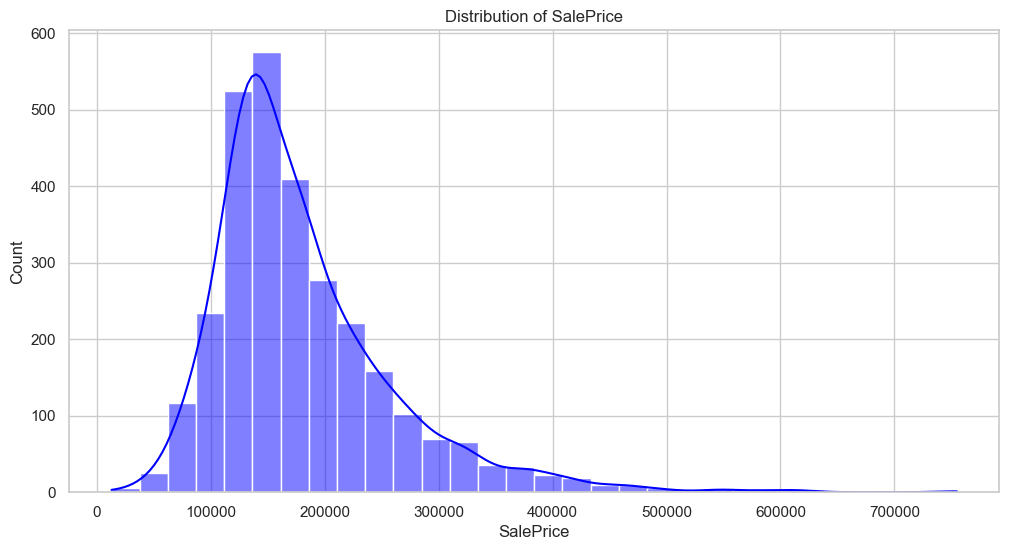

In [32]:
#check histogram and log transform of the target variable
plt.figure(figsize=(12, 6))
sns.histplot(data[target_column], kde=True, color="blue",bins =30)
plt.title("Distribution of SalePrice")
plt.show()

The skewness of the target variable is:  -0.19293763741266626


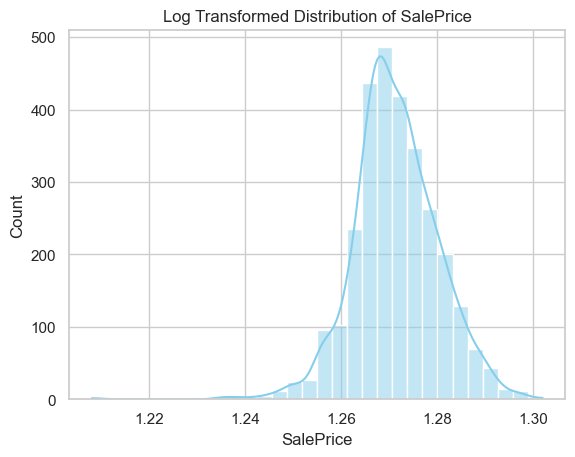

In [37]:
#Check skewness of the target variable
# If the skewness is greater than 0.5, we can apply log transformation
print("The skewness of the target variable is: ", data[target_column].skew())

#Log transform the target variable
data[target_column] = np.log1p(data[target_column])

#Check histogram and log transform of the target variable after log transformation
sns.histplot(data[target_column], kde=True, color="skyblue", bins=30)
plt.title("Log Transformed Distribution of SalePrice")
plt.show()

In [ ]:
#Numerical feature correlation with target column
numerical_features = data.select_dtypes(include=['float64', 'int64'])

#correlation with target column
correlation = numerical_features.corr()
top_correlated_features = correlation[target_column].sort_values(ascending=False)
print("Top correlated features with target column: \n", top_correlated_features)

Top correlated features with target column: 
 SalePrice          1.000000
Overall Qual       0.821955
Gr Liv Area        0.689031
Garage Cars        0.671455
Garage Area        0.645877
Total Bsmt SF      0.619659
Year Built         0.615169
1st Flr SF         0.595904
Year Remod/Add     0.585868
Garage Yr Blt      0.580647
Full Bath          0.574597
TotRms AbvGrd      0.488541
Fireplaces         0.485558
Mas Vnr Area       0.439347
BsmtFin SF 1       0.405904
Lot Frontage       0.345832
Wood Deck SF       0.331066
Open Porch SF      0.316961
Half Bath          0.305296
Bsmt Full Bath     0.273067
2nd Flr SF         0.272784
Lot Area           0.251425
Bsmt Unf SF        0.192810
Bedroom AbvGr      0.183561
Screen Porch       0.109662
Pool Area          0.053137
3Ssn Porch         0.040616
Mo Sold            0.038880
BsmtFin SF 2       0.019900
Misc Val          -0.007997
Bsmt Half Bath    -0.018663
Order             -0.027931
Yr Sold           -0.033591
Overall Cond      -0.040077
Lo

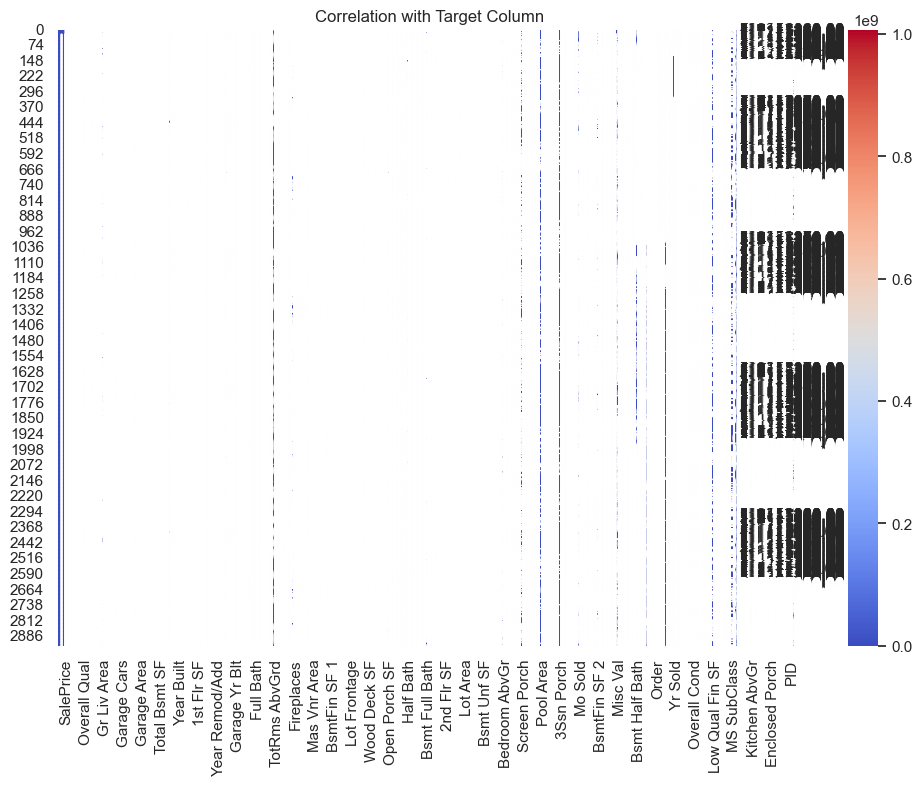

In [47]:
#heatmap of the correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(numerical_features[top_correlated_features.index], annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation with Target Column")
plt.show()

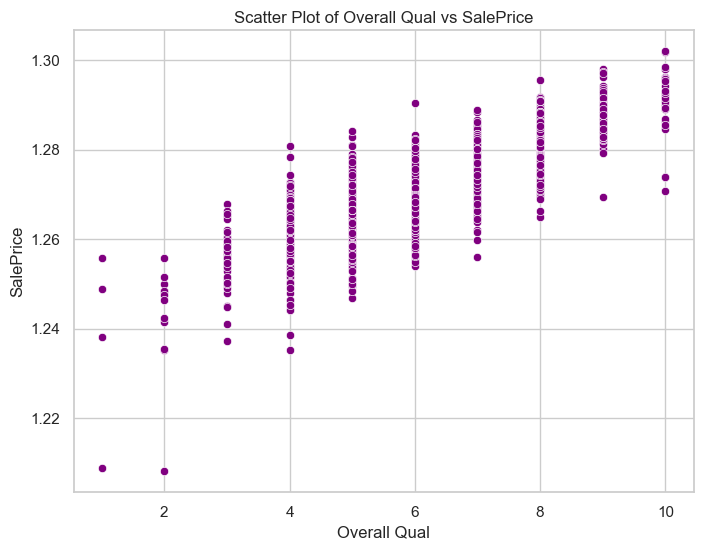

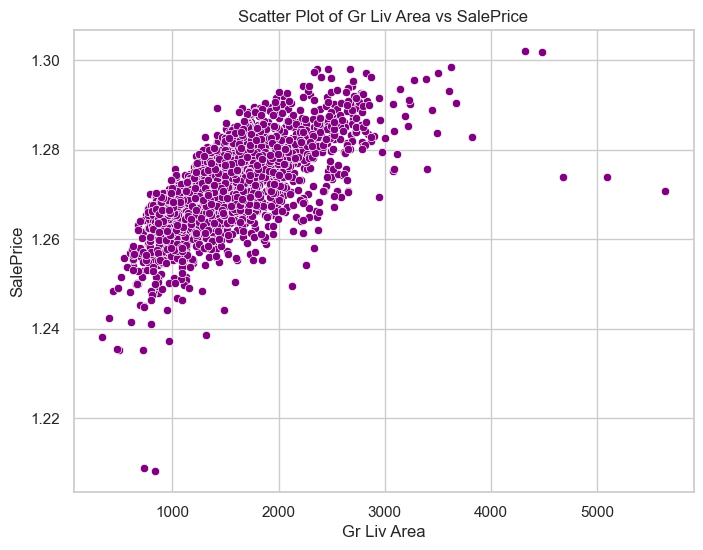

In [50]:
#scatter plots with top correlated features
for feature in top_correlated_features.index[1:3]:  # Exclude the target column itself
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature], y=data[target_column], color='purple')
    plt.title(f"Scatter Plot of {feature} vs {target_column}")
    plt.xlabel(feature)
    plt.ylabel(target_column)
    plt.show()

/var/folders/k0/xkqq0j_x06v50ftc1hzhv5jw0000gn/T/ipykernel_5315/2190361388.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x="House Style", y="SalePrice", palette='Set2')


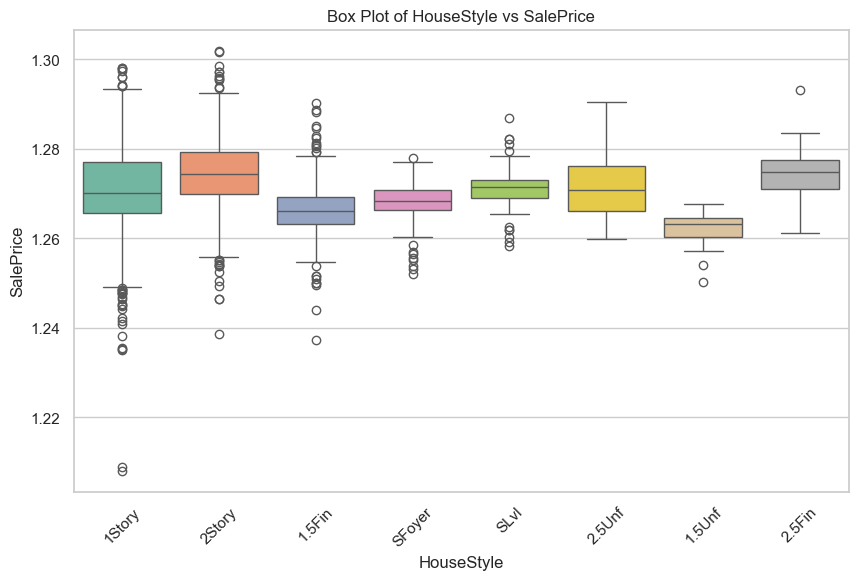

In [57]:
#box plots for categorical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="House Style", y="SalePrice", palette='Set2')
plt.title(f"Box Plot of HouseStyle vs SalePrice")
plt.xlabel('HouseStyle')
plt.ylabel('SalePrice')
plt.xticks(rotation=45)
plt.show()  

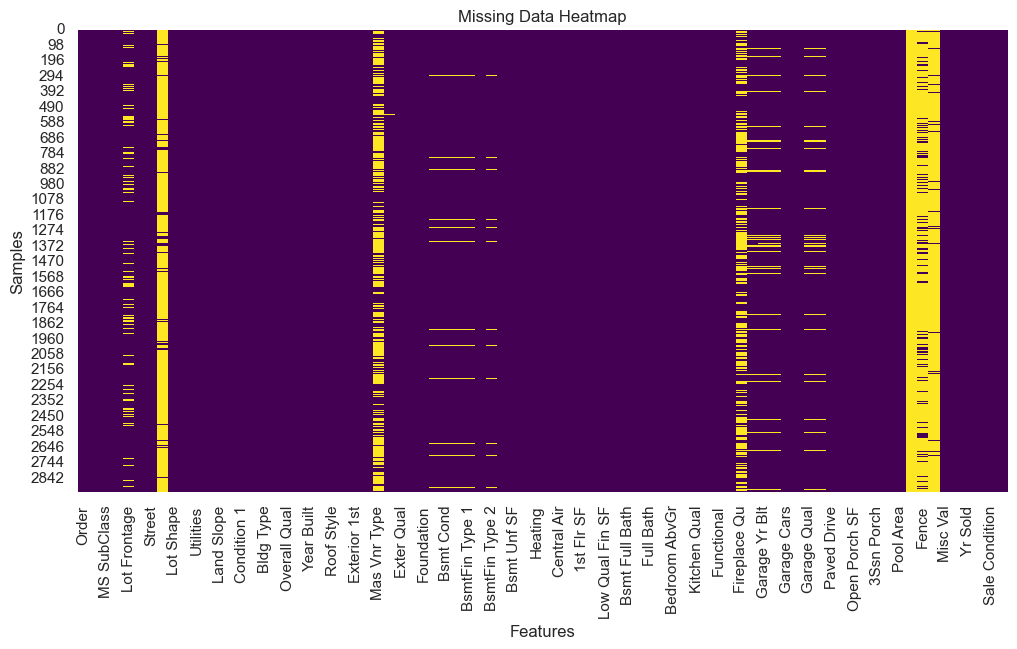

In [58]:
#missing data visualization
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()

Data cleaning and Feature Engineering